You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [68]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


EDA/ Data Cleaning:
- Checked isna: no na in dataset
- sex: only has 'MALE' or 'FEMALE' -> could be category
- range: all columns have reasonable range 
- data types: all float except sex which object

- need to dummify 'sex' column and standardised
- need to find best n_clusters

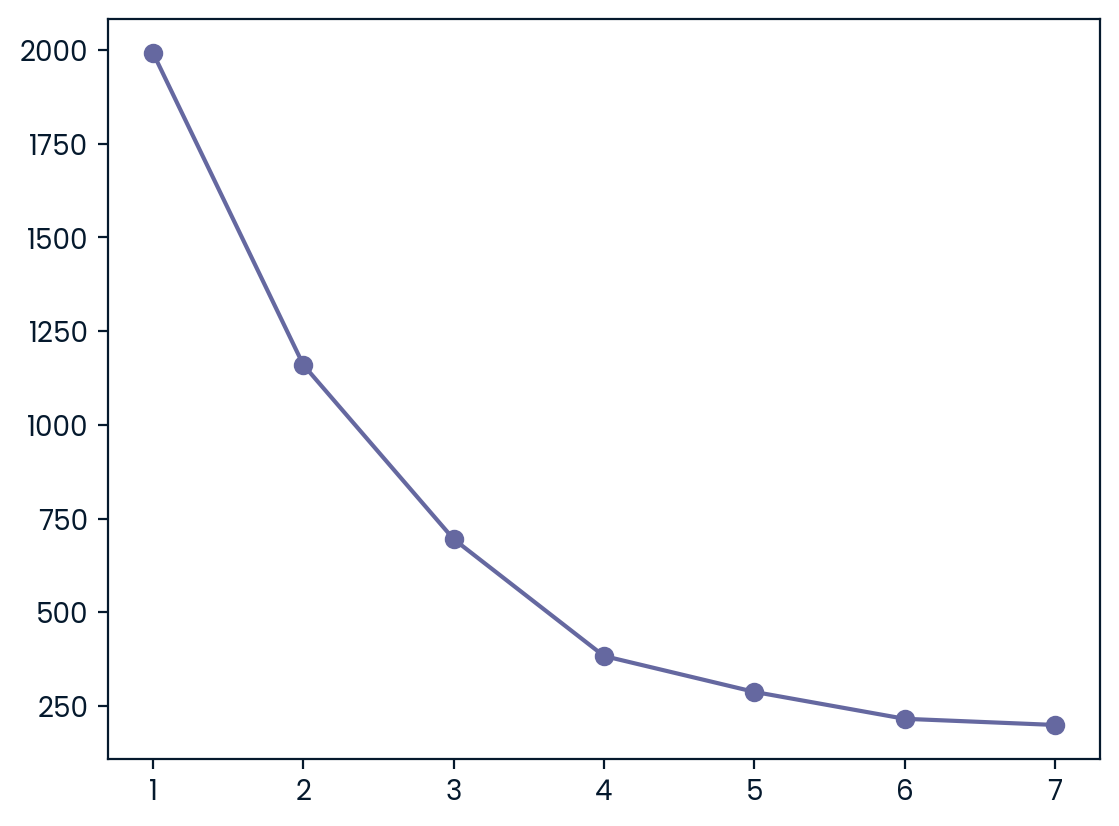

In [69]:
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

penguins_df = pd.get_dummies(penguins_df)

n_cluster_list = [1, 2, 3, 4, 5, 6, 7]
inertia_list = {}

for num in n_cluster_list:
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=num)
    
    pipeline = make_pipeline(scaler, kmeans)
    pipeline.fit(penguins_df)
    labels = pipeline.predict(penguins_df)
    inertia = pipeline.named_steps['kmeans'].inertia_
    
    inertia_list[num] = inertia
    
plt.plot(list(inertia_list.keys()), list(inertia_list.values()), marker = 'o')
plt.show()

From graph 4/5 looks like the best choice for n_clusters.
This analysis will choose 4.

In [70]:
 scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)

pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(penguins_df)

penguins_df['cluster'] = pipeline.predict(penguins_df)

stat_penguins = penguins_df.groupby('cluster')[['culmen_length_mm','culmen_depth_mm','flipper_length_mm']].mean()
stat_penguins.columns = ['mean_' + col for col in c_length_mean.columns]

print(stat_penguins)

         mean_mean_culmen_length_mm  ...  mean_mean_flipper_length_mm
cluster                              ...                             
0                         45.563793  ...                   212.706897
1                         40.217757  ...                   189.046729
2                         43.878302  ...                   194.764151
3                         49.473770  ...                   221.540984

[4 rows x 3 columns]
